In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split



In [2]:
df = pd.read_csv("archive/spambase_csv.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

In [4]:
df.shape

(4601, 58)

In [5]:
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [6]:
df.isna().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

In [7]:
df.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

In [20]:
x=df.drop(['class'],axis=1) #------->its dropping class colum....since other columns are fearues column
y=df['class']   #------>this is to seperate target column from the rest


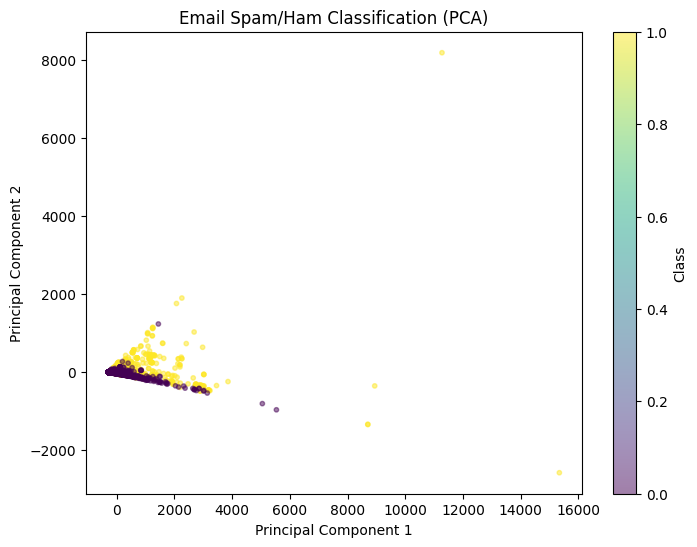

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(x)

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', s=10, alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Email Spam/Ham Classification (PCA)')
plt.colorbar(label='Class')
plt.show()

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=11,test_size=0.2)

In [10]:
from sklearn import svm
from sklearn.svm import SVC

In [11]:
model = SVC(random_state = 0)
model.fit(x_train, y_train)

SVC(random_state=0)

In [12]:
model.score(x_test,y_test)

0.6905537459283387

In [13]:
import joblib
joblib.dump(model, 'svm_model.pkl')

loaded_model = joblib.load('svm_model.pkl')
predictions = loaded_model.predict(x_test)

In [14]:
print(y_test)


2418    0
174     1
2849    0
3477    0
754     1
       ..
637     1
18      1
3933    0
2186    0
475     1
Name: class, Length: 921, dtype: int64


In [15]:
print(predictions)
print(len(predictions))


[0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 1 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1
 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0
 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1
 0 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0
 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 1 0 0 1
 0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0
 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0
 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 1 1 1 1 0 1 0 0 1 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0
 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 1 0 0 0 1 0 0 0 

In [16]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
print("Test Accuracy:", accuracy)


Test Accuracy: 0.6905537459283387


In [21]:
train_predictions = model.predict(x_train)

# Calculate the training accuracy by comparing the predicted labels with the actual labels
train_accuracy = accuracy_score(y_train, train_predictions)

print("Training Accuracy:", train_accuracy)

Training Accuracy: 0.7125


Using different Kernel functions:

In [17]:
linearSVM = svm.SVC(kernel='linear')
polynomialSVM = svm.SVC(kernel='poly', degree=3)  
rbfSVM = svm.SVC(kernel='rbf')
sigmoidSVM = svm.SVC(kernel='sigmoid')

In [18]:
linearSVM.fit(x_train,y_train)


SVC(kernel='linear')

In [19]:
linear_predictions = linearSVM.predict(x_test)


In [24]:
polynomialSVM.fit(x_train,y_train)


SVC(kernel='poly')

In [29]:
poly_predictions = polynomialSVM.predict(x_test)


In [25]:
rbfSVM.fit(x_train,y_train)


SVC()

In [30]:
rbf_predictions = rbfSVM.predict(x_test)


In [26]:
sigmoidSVM.fit(x_train,y_train)

SVC(kernel='sigmoid')

In [32]:
sigmoid_predictions = sigmoidSVM.predict(x_test)


In [33]:

linear_accuracy = accuracy_score(y_test, linear_predictions)
poly_accuracy = accuracy_score(y_test, poly_predictions)
rbf_accuracy = accuracy_score(y_test, rbf_predictions)
sigmoid_accuracy = accuracy_score(y_test, sigmoid_predictions)

print("Linear SVM Accuracy:", linear_accuracy)
print("Polynomial SVM Accuracy:", poly_accuracy)
print("RBF SVM Accuracy:", rbf_accuracy)
print("Sigmoid SVM Accuracy:", sigmoid_accuracy)

Linear SVM Accuracy: 0.9381107491856677
Polynomial SVM Accuracy: 0.6449511400651465
RBF SVM Accuracy: 0.6905537459283387
Sigmoid SVM Accuracy: 0.6547231270358306


TRAINING ACCURACIES

In [35]:
svm_linear_model = svm.SVC(kernel='linear')
svm_linear_model.fit(x_train, y_train)

train_predictions_linear = svm_linear_model.predict(x_train)
train_accuracy_linear = accuracy_score(y_train, train_predictions_linear)
print("Training Accuracy (Linear Kernel):", train_accuracy_linear)

Training Accuracy (Linear Kernel): 0.9339673913043478


In [36]:
svm_poly_model = svm.SVC(kernel='poly')
svm_poly_model.fit(x_train, y_train)

train_predictions_poly = svm_poly_model.predict(x_train)
train_accuracy_poly = accuracy_score(y_train, train_predictions_poly)
print("Training Accuracy (poly Kernel):", train_accuracy_poly)

Training Accuracy (poly Kernel): 0.6551630434782608


In [37]:
svm_rbf_model = svm.SVC(kernel='rbf')
svm_rbf_model.fit(x_train, y_train)

train_predictions_rbf = svm_rbf_model.predict(x_train)
train_accuracy_rbf = accuracy_score(y_train, train_predictions_rbf)
print("Training Accuracy (rbf Kernel):", train_accuracy_rbf)

Training Accuracy (rbf Kernel): 0.7125


In [38]:
svm_sigmoid_model = svm.SVC(kernel='sigmoid')
svm_sigmoid_model.fit(x_train, y_train)

train_predictions_sigmoid = svm_sigmoid_model.predict(x_train)
train_accuracy_sigmoid = accuracy_score(y_train, train_predictions_sigmoid)
print("Training Accuracy (sigmoid Kernel):", train_accuracy_sigmoid)

Training Accuracy (sigmoid Kernel): 0.6432065217391304


In [39]:
print("\nTraining Accuracy\n")
print("Training Accuracy (Linear Kernel):", train_accuracy_linear)
print("Training Accuracy (poly Kernel):", train_accuracy_poly)
print("Training Accuracy (rbf Kernel):", train_accuracy_rbf)
print("Training Accuracy (sigmoid Kernel):", train_accuracy_sigmoid)



print("\n\nTesting Accuracy\n")
print("Linear SVM Accuracy:", linear_accuracy)
print("Polynomial SVM Accuracy:", poly_accuracy)
print("RBF SVM Accuracy:", rbf_accuracy)
print("Sigmoid SVM Accuracy:", sigmoid_accuracy)


Training Accuracy

Training Accuracy (Linear Kernel): 0.9339673913043478
Training Accuracy (poly Kernel): 0.6551630434782608
Training Accuracy (rbf Kernel): 0.7125
Training Accuracy (sigmoid Kernel): 0.6432065217391304


Testing Accuracy

Linear SVM Accuracy: 0.9381107491856677
Polynomial SVM Accuracy: 0.6449511400651465
RBF SVM Accuracy: 0.6905537459283387
Sigmoid SVM Accuracy: 0.6547231270358306


In [44]:
from sklearn.metrics import precision_score, f1_score, roc_curve, auc

print("Other metrics:")

predictionsLinear = svm_linear_model.predict(x_test)

# Calculate precision
precisionLinear = precision_score(y_test, predictionsLinear)

# Calculate F1 score
f1Linear = f1_score(y_test, predictionsLinear)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, predictionsLinear)

# Calculate AUC score
auc_scoreLinear = auc(fpr, tpr)


print("Linear:", precisionLinear)
print("F1 Score:", f1Linear)
print("AUC Score:", auc_scoreLinear)
print("\n\n_____________________________________\n\n")


predictionsPoly = svm_poly_model.predict(x_test)

# Calculate precision
precisionPoly = precision_score(y_test, predictionsPoly)

# Calculate F1 score
f1Poly = f1_score(y_test, predictionsPoly)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, predictionsPoly)

# Calculate AUC score
auc_scorePoly = auc(fpr, tpr)

print("Precision:", precisionPoly)
print("F1 Score:", f1Poly)
print("AUC Score:", auc_scorePoly)

print("\n\n_____________________________________\n\n")

predictionsrbf = svm_rbf_model.predict(x_test)

# Calculate precision
precisionrbf = precision_score(y_test, predictionsrbf)

# Calculate F1 score
f1rbf = f1_score(y_test, predictionsrbf)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, predictionsrbf)

# Calculate AUC score
auc_scorerbf = auc(fpr, tpr)

print("Precision:", precisionrbf)
print("F1 Score:", f1rbf)
print("AUC Score:", auc_scorerbf)
print("\n\n_____________________________________\n\n")


predictionsSig = svm_sigmoid_model.predict(x_test)

# Calculate precision
precisionSig = precision_score(y_test, predictionsSig)

# Calculate F1 score
f1Sig = f1_score(y_test, predictionsSig)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, predictionsSig)

# Calculate AUC score
auc_scoreSig = auc(fpr, tpr)

print("Precision:", precisionSig)
print("F1 Score:", f1Sig)
print("AUC Score:", auc_scoreSig)


Other metrics:
Linear: 0.9258241758241759
F1 Score: 0.9220246238030096
AUC Score: 0.9347598343481639


_____________________________________


Precision: 0.8448275862068966
F1 Score: 0.23058823529411765
AUC Score: 0.5586347495057005


_____________________________________


Precision: 0.6782608695652174
F1 Score: 0.5226130653266332
AUC Score: 0.6457470563353958


_____________________________________


Precision: 0.5649867374005305
F1 Score: 0.5725806451612904
AUC Score: 0.6421762952616099


INFERENCE:

In Support Vector Machine (SVM) models, the kernel function plays a crucial role in transforming the input data into a higher-dimensional space, where it might be easier to classify the data using a linear decision boundary. 

1. Linear kernel:
    It computes the dot product between the input feature vectors, which effectively calculates the similarity between them.
  
2. Polynomial Kernel:
    The polynomial kernel function is used to handle nonlinear relationships between the features.
    It maps the data into a higher-dimensional space using polynomial functions.

3. Radial Basis Function (RBF) Kernel:
    The RBF kernel, also known as the Gaussian kernel, is widely used in SVMs due to its flexibility.
    It maps the data into an infinite-dimensional space using Gaussian radial basis functions.
    The RBF kernel considers all possible transformations of the input data into a higher-dimensional space.

4. Sigmoid Kernel:
    The sigmoid kernel is another kernel function used in SVMs.
    It is based on the hyperbolic tangent function and is suitable for classification problems.

For spam mail classification, Linear kernel performs better.
The data  is more linearly separable, meaning a linear decision boundary can effectively separate spam and non-spam emails.
